# Linear Regression

##Contents

0.   Learning Objectives
1.   Tutorial Details
2.   Problem Statement Description
3.   Import Packages
4.   Load and Prepare the Dataset
5.   Peform Exploratory Data Analysis (EDA)
6.   Model Building: Training and Testing
7.   Results and Interpretation
8.   Conclusion
9.   Try it yourself excercise
10.  Summary

# 0. Learning Objectives

In this module, we will learn the following:

*   Application of **Linear Regression** on a public dataset
*   Handle **missing values** in the data
*   Understand the use of summary statistics, correlation analysis, and visualizations of the data to perform **Exploratory Data Analysis**
*   **Training and Testing** an ML model




#1. Tutorial Details

*   **ML Topic(s) Covered**: Linear Regression
*   Approximate model training time: Less than 5 min.

#2. Problem Statement Description

*   **Objective**: To build a linear regression model for the prediction of final year grades of students using the available data.
*   **Data Description**: This data is adapted from the "Student Performance Data Set" available at UCI Machine Learning Repository. This data is of students who pursued a 3-year degree program.
*   Each row represents the features (attributes) of a particular student. This is a data of 365 stduents, so the data contains 365 rows.
*   There are 5 data features (columns) - student's score in the first year, score in the second year, study time, number of failures throughout, and the absences recorded. The score in the final year is the target (outcome or response or dependent) variable.



*   More information is available here: https://archive.ics.uci.edu/ml/datasets/Student+Performance#

# 3. Import Packages

Package versions

*   pandas==1.4.4
*   matplotlib==3.7.1
*   sklearn==1.2.2



In [16]:
# Pandas contains functions data manipulation and analysis
import pandas as pd

# Matplotlib is a data visualization library containing functions for static, animated, and interactive 2D and 3D plots
import matplotlib.pyplot as plt

# Scikit-learn (sklearn) contains functions of machine learning models, evaluation metrics, helper functions and datasets
import sklearn

#4. Load and Prepare the Dataset

In [17]:
#Import the data from the provided URL and store it as a DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/sachinmotwani20/NPTEL-ML_Datasets/main/ScoresPrediction.csv")
#Print top 5 rows of the dataframe
data.head()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
0,5,6,2,0,6,6
1,5,5,2,0,4,6
2,7,8,2,3,10,10
3,15,14,3,0,2,15
4,6,10,2,0,4,10


The data might be placed in other file formats, such as .xlsx or .json.  One may check https://pandas.pydata.org/docs/reference/io.html for the pandas functions to read these extensions.

For the ease of working, often the data is arranged as a pandas DataFrame or numpy multi-dimensional array.

Notice that the target variable is present as the last column of the data. Often, this is the case.

In [18]:
#Print the shape of the data
data.shape

(395, 6)

There are 6 columns and 395 rows in the imported data.

In [19]:
#Check information about the data including information about the rows and columns, number of non-null values per column, datatype of each column  and total memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   FirstYrScore   395 non-null    int64
 1   SecondYrScore  395 non-null    int64
 2   StudyTime      395 non-null    int64
 3   Failures       395 non-null    int64
 4   Absences       395 non-null    int64
 5   FinalYrScore   395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


We can see that there are all integer values in all the 6 columns of the dataset, including the labels.

The total memory useage of the data is 18.6 KB (It is a small data).

### Missing Values

One might encounter the following terms when talking about missing values- **NAN, NA, or NULL values**. All these terms simply mean the same in our context.


Below, we are checking the dataset for missing values, data type of each column, etc. This is helpful to clean the data before analysis.

In [20]:
#Check if there is any null value per column
data.isnull().any()

FirstYrScore     False
SecondYrScore    False
StudyTime        False
Failures         False
Absences         False
FinalYrScore     False
dtype: bool

There are no null value in any column. Had there been any, the second column above would be *True* for that particular column.

The total number of null values per column can be printed using the below function.

In [21]:
#Check the total number of null values per column
data.isnull().sum()

FirstYrScore     0
SecondYrScore    0
StudyTime        0
Failures         0
Absences         0
FinalYrScore     0
dtype: int64

### Handling missing values

Had there been any missing values, one may handle them with one of the following techniques. Note that this is not an exhaustive list.

A. **Deletion**: You can simply delete the rows or columns with missing values. However, this approach can result in loss of information in the data.

B. **Imputation**: You can replace the missing values with some estimated values. There are several methods of imputation, including:


1.   **Mean/Median/Mode imputation**: Replace the missing values with the mean, median or mode of the non-missing values in the same column.
  *   *Example 1*: In a dataset of house price prediction, there are missing values for the number of bedrooms in some of the properties. You can replace the missing values with the median number of bedrooms in the non-missing properties.
  * *Example 2*: In a dataset of customer satisfaction ratings, there are missing values for the age of some of the customers. You can replace the missing values with the mode age (most common age) in the non-missing customers.

2.   **Regression imputation**: Predict the missing values using a regression model based on the non-missing values.
  * *Example 1*: In a dataset of predictions of employee salaries, there are missing values for the years of experience of some of the employees. You can use a regression model based on the non-missing values of salary and years of experience to predict the missing values.
  * *Example 2*: In a dataset of prediction of whether medical insurance claims will be raised or not, there are missing values for the amount claimed for some of the patients. You can use a regression model based on the non-missing values of age, gender, and diagnosis to predict the missing values.



3.   **K-Nearest Neighbor imputation**: Find the k-nearest neighbors of the missing value based on the non-missing values and use their average to replace the missing value.

  * *Example 1*: In a dataset of student grades prediction, there are missing values for the final exam score of some of the students. You can find the 5 nearest neighbors of each missing value based on the non-missing values of midterm exam scores, attendance, and participation, and use their average to replace the missing value.
  * *Example 2*: In a dataset of prediction if the credit card transaction is fraudulent, there are missing values for the amount spent for some of the transactions. You can find the 10 nearest neighbors of each missing value based on the non-missing values of merchant type, time of day, and day of the week, and use their average to replace the missing value.

4.   **Multiple Imputation**: Create multiple imputed datasets by filling in the missing values with different plausible values and then analyze each dataset. This approach is more computationally intensive but can provide more accurate results.
  * *Example 1*: In a dataset of car sales prediction, there are missing values for the price of some of the cars. You can create 10 imputed datasets by filling in the missing values with different plausible values based on the non-missing values of features -  make, model, year, mileage, and condition, and then analyze each dataset to obtain more accurate estimates.
  * Example 2: In a dataset of customer churn (i.e., the percentage of customers that stopped using your company's product or service during a certain time frame), there are missing values for the tenure of some of the customers. You can create 5 imputed datasets by filling in the missing values with different plausible values based on the non-missing values of age, gender, income, and contract type, and then analyze each dataset to obtain more accurate predictions of customer churn.

C.   **Treat missing values as a separate category**: If the missing values are not randomly missing, i.e,  you can create a new category to represent the missing values. This approach works well for categorical variables.

* *Example 1*: In a dataset of customer feedback, there are missing values for the reason why some customers were dissatisfied with a product. You can treat the missing values as a separate category to indicate that the reason for dissatisfaction is unknown.
* *Example 2*: In a dataset of employee performance ratings, there are missing values for the supervisor's rating of some employees. You can treat the missing values as a separate category to indicate that the supervisor did not provide a rating for that employee.


The choice of method *depends on the nature and amount of missing data, the type of data, and the purpose of the analysis*. It is important to carefully consider the implications of each method and the impact on the analysis before deciding how to handle missing values.

For example, in a diabetes prediction dataset, one cannot simply take a mean of Haemoglobin (Hb) of the other patients, as this could have health-critical implications.

### Separating Features and response variable

Below, let us separate the features (independent variables) and the target variable (dependent variable) in the data.

In [22]:
features = data.iloc[:, :-1]
predictions = data.iloc[:, -1] #Last column contains the target variable

In [23]:
#Print a fews rows of independent variables
features.head()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences
0,5,6,2,0,6
1,5,5,2,0,4
2,7,8,2,3,10
3,15,14,3,0,2
4,6,10,2,0,4


In [24]:
#Print a fews rows of dependent variables
predictions.head()

0     6
1     6
2    10
3    15
4    10
Name: FinalYrScore, dtype: int64

The data is split into features and predictions. Now, it will be further divided into the training and testing data.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, predictions, test_size=0.2, random_state=42, shuffle=True)
#20% of the total data is kept as test data

It is clearly eveident that there are no missing values in the data.

#5.   Peform Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is a crucial step in understanding and analyzing any dataset.

Henceforth, all the analysis will be performed on the train dataset only. Since the test data is not supposed to be used during training, it is kept separate and is not used for any purpose, while we are building the model. In other words, for model building, we assume that test data is not available to us.

In [26]:
Train_data = pd.concat([X_train, y_train], axis = 'columns', #Join along the columns
                       names=['FirstYrScore', 'SecondYrScore', 'StudyTime', 'Failures', 'Absences', 'FinalYrScore'])
Train_data.head()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
181,12,13,2,0,2,12
194,13,14,1,0,0,14
173,8,7,2,3,0,0
63,10,9,3,0,2,9
253,8,9,1,0,0,8


### Summary Statistics

The summary statistics tell us about the distribution (mean, standard deviation, etc.) of all the numerical features in the data. These are particularly helpful in the following ways.

*  **Understanding the distribution of data**: Summary statistics help understand the central tendency and variability of the data. For example, if the mean and median are close, it indicates that the distribution is relatively symmetrical. On the other hand, if the mean is much higher or lower than the median, it indicates that the distribution is skewed.
*  **Identifying missing values**: Summary statistics can help identify if there are any missing values in the dataset. By looking at the count of non-null values for each feature, one can determine if there are any missing values that need to be handled before building a model.
*  **Detecting Outliers**: Outliers can significantly impact the performance of a machine learning model. Summary statistics such as minimum and maximum values, as well as the range and quartile ranges, can help to identify potential outliers.
*  **Feature selection**: Summary statistics can help in selecting the most relevant features for an ML model. By analyzing the variance of each feature, one can identify which features have low variability and may not be useful in predicting the target variable.
*  **Data preprocessing**: Summary statistics can help in determining if data normalization or scaling is required. If the range of values for different features varies significantly, then normalization or scaling may be required to bring the data to a similar range, which can improve the performance of the ML model.


### Summary Statistics

In [27]:
#Print summary statistics
Train_data.describe()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,10.933544,10.651899,2.047468,0.335443,5.905063,10.325949
std,3.216823,3.755930,0.836258,0.735588,8.422033,4.590337
min,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.000000,9.000000,1.000000,0.000000,0.000000,8.000000
50%,11.000000,11.000000,2.000000,0.000000,4.000000,11.000000
75%,13.000000,13.000000,2.000000,0.000000,8.000000,13.000000
max,19.000000,19.000000,4.000000,3.000000,75.000000,20.000000


The following observations are made.
* There are no outliers in the data.

### Correlation Analysis

The correlation coefficients are calculated between the features and the target variable to identify which features are strongly correlated with the target variable.

Here, this can help identify which variables are most important in predicting the final year scores.

In [28]:
#Perform correlation analysis between numerical features
corr_mat = Train_data.corr(method ='pearson') #Pearson correlation is used
corr_mat

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
FirstYrScore,1.000000,0.833365,0.202975,-0.346077,-0.004218,0.791559
SecondYrScore,0.833365,1.000000,0.153854,-0.335638,-0.007070,0.907924
StudyTime,0.202975,0.153854,1.000000,-0.129183,-0.029558,0.138200
Failures,-0.346077,-0.335638,-0.129183,1.000000,0.023092,-0.373769
Absences,-0.004218,-0.007070,-0.029558,0.023092,1.000000,0.064607
FinalYrScore,0.791559,0.907924,0.138200,-0.373769,0.064607,1.000000


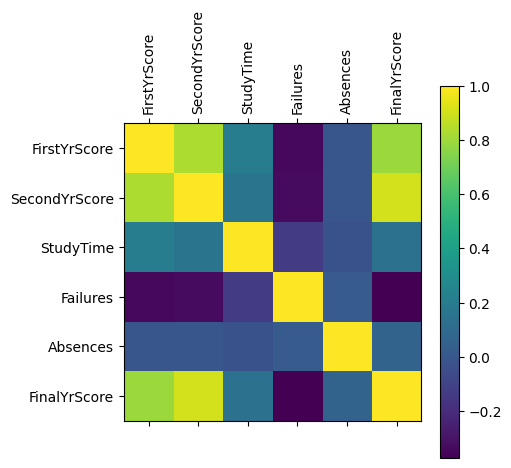

In [35]:
# Visualize the correlation matrix
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

The feature *SecondYrScore* is the most correlated with the target variable with a correlation coefficient of ~0.91. This is followed by *FirstYrScore* with a score of ~0.8.

### Visualizations
Plot the scatter plot between the dependent varibale and the individual independent variables.

[]

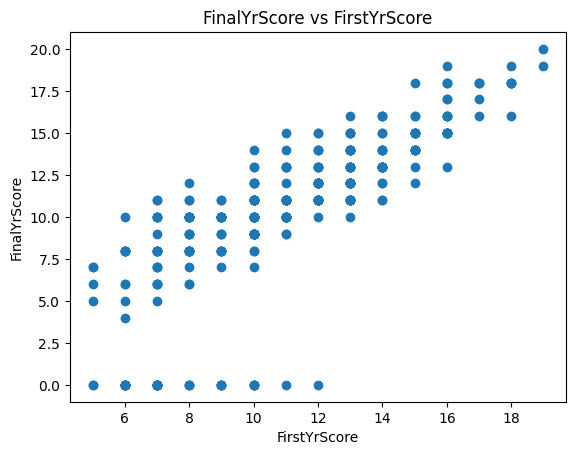

In [36]:
plt.scatter(X_train['FirstYrScore'], y_train)
plt.title("FinalYrScore vs FirstYrScore")
plt.xlabel("FirstYrScore")
plt.ylabel("FinalYrScore")
plt.plot()

There seems to be a linear relationship between First Year Score and Final Year Score.

[]

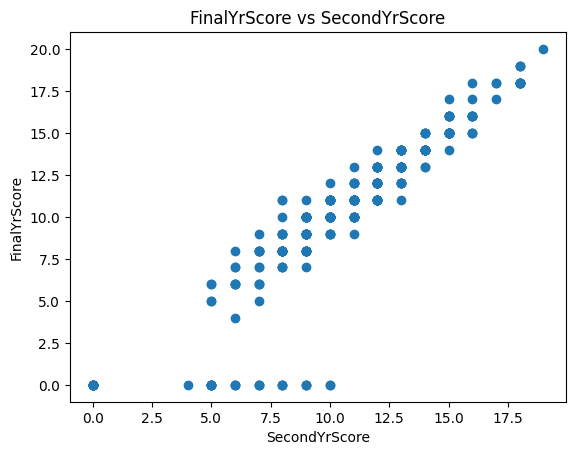

In [37]:
plt.scatter(X_train['SecondYrScore'], y_train)
plt.title("FinalYrScore vs SecondYrScore")
plt.xlabel("SecondYrScore")
plt.ylabel("FinalYrScore")
plt.plot()

Similar to First Year Score, a linear relationship is evident between the Seocnd Year Score and Final Year Score.

[]

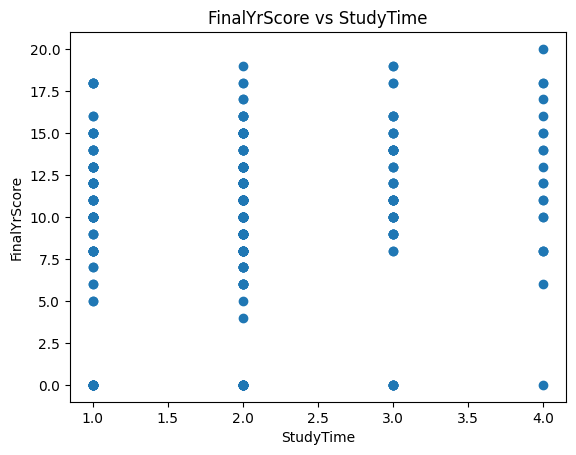

In [38]:
plt.scatter(X_train['StudyTime'], y_train)
plt.title("FinalYrScore vs StudyTime")
plt.xlabel("StudyTime")
plt.ylabel("FinalYrScore")
plt.plot()

No direct relationship is evident between the Study Time and the Final Year Score of the student.

[]

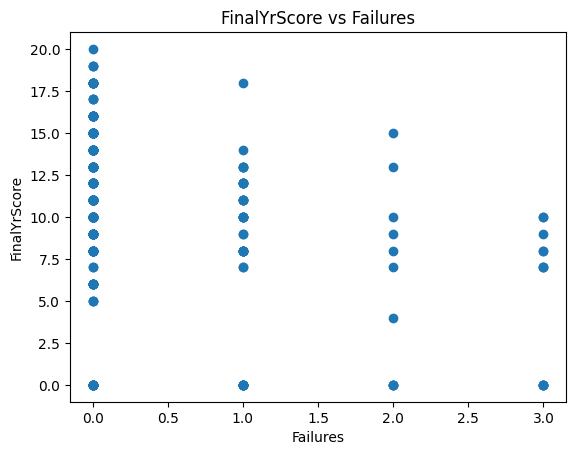

In [39]:
plt.scatter(X_train['Failures'], y_train)
plt.title("FinalYrScore vs Failures")
plt.xlabel("Failures")
plt.ylabel("FinalYrScore")
plt.plot()

No direct relationship evident between the two columns is visible.

[]

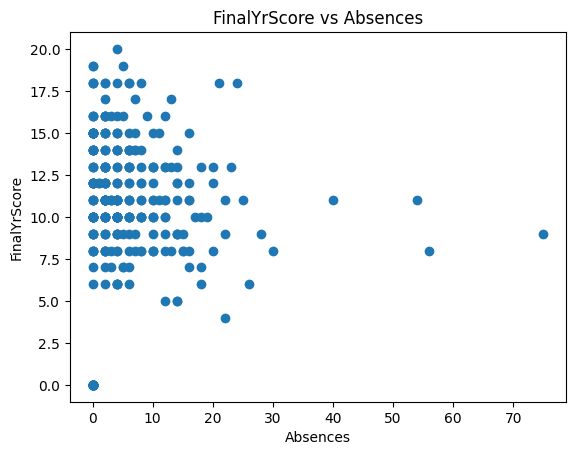

In [40]:
plt.scatter(X_train['Absences'], y_train)
plt.title("FinalYrScore vs Absences")
plt.xlabel("Absences")
plt.ylabel("FinalYrScore")
plt.plot()

No direct relation between the final marks and absences is visible.

#6.   Model Building: Training and Testing

In [41]:
#Import Linear Regression class
from sklearn.linear_model import LinearRegression
model = LinearRegression() #Define an object of Linear Regression class

model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set

# 7. Results and Interpretation

In [42]:
# Evaluate the model using commonly used metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the evaluation metrics on train data
print("Evaluation metrics: Train Data")
print("Mean absolute error: ", mae_train)
print("Mean squared error: ", mse_train)
print("R-squared score: ", r2_train)

Evaluation metrics: Train Data
Mean absolute error:  1.1265771263839486
Mean squared error:  3.4019386784510868
R-squared score:  0.8380377535545163


Below, let us check the evaluation metrics of the test data-the data that out model has not seen before.

In [43]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Print the evaluation metrics on test data
print("Evaluation metrics: Test Data")
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Evaluation metrics: Test Data
Mean absolute error:  1.3394159082670916
Mean squared error:  4.466503212015603
R-squared score:  0.7821754247320556


In [44]:
print("Model coefficients: ", model.coef_)
print("Corresponding features: ", features.columns.values)

Model coefficients:  [ 0.14446336  0.97961532 -0.07123057 -0.45581289  0.0392449 ]
Corresponding features:  ['FirstYrScore' 'SecondYrScore' 'StudyTime' 'Failures' 'Absences']


As we anticipated from the correlation coefficients of the EDA, the model output is significantly more related to the 'SecondYrScore' than 'FirstYrScore'.

The coefficient of 'Failures' is negatively related to the prediction variable with a comparatively high magnitude than other negatively related features. This is quite intuitive.

Counterintuitively, the 'StudyTime' and 'Absence' have very low correlation with the predicted variable.

#8.   Conclusion



We have built a linear regression model that predicts the Final Year Score of the students with an R2 score of 0.83 on train data.

The model performance (R2 score) is 0.78 on the test data. We also analysed during the EDA that First and Second year scores directly impact the scores of the students in the Final Year. This is not so for other features.

# 9.   Try it yourself excercise



*   **Problem Statement**: Using linear regression, predict house price based on available relevant data.
*   **Task**: Use the california housing data available in sklearn (imported below) to predict the prices of houses.
*   More information is available here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html and https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

Note: This excercise is for your own practice only. Neither its solution will be shared nor will it be evaluated.



In [45]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [46]:
labels = pd.DataFrame(data.target, columns= data.target_names)
labels.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [50]:
labels.isnull().sum()

MedHouseVal    0
dtype: int64

In [51]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, predictions, test_size=0.2, random_state=42, shuffle=True)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,labels,test_size=0.2,random_state=42,shuffle=True)

In [53]:
# Train_data = pd.concat([X_train, y_train], axis = 'columns', #Join along the columns
#                        names=['FirstYrScore', 'SecondYrScore', 'StudyTime', 'Failures', 'Absences', 'FinalYrScore'])
# Train_data.head()

Train_data = pd.concat([X_train,y_train],axis='columns',
                       names=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','MedHouseVal'])
Train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965


In [54]:
Train_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [55]:
corr_mat = Train_data.corr(method ='pearson') #Pearson correlation is used
corr_mat

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.121711,0.336013,-0.072550,0.004122,0.022061,-0.076571,-0.017040,0.690647
HouseAge,-0.121711,1.000000,-0.160892,-0.087983,-0.292283,0.016245,0.005296,-0.101818,0.103706
AveRooms,0.336013,-0.160892,1.000000,0.836163,-0.073733,-0.004922,0.110695,-0.029339,0.158485
AveBedrms,-0.072550,-0.087983,0.836163,1.000000,-0.071267,-0.006035,0.073161,0.016647,-0.051351
Population,0.004122,-0.292283,-0.073733,-0.071267,1.000000,0.072330,-0.102499,0.094276,-0.026032
AveOccup,0.022061,0.016245,-0.004922,-0.006035,0.072330,1.000000,0.005837,-0.000598,-0.022030
Latitude,-0.076571,0.005296,0.110695,0.073161,-0.102499,0.005837,1.000000,-0.924485,-0.142983
Longitude,-0.017040,-0.101818,-0.029339,0.016647,0.094276,-0.000598,-0.924485,1.000000,-0.046349
MedHouseVal,0.690647,0.103706,0.158485,-0.051351,-0.026032,-0.022030,-0.142983,-0.046349,1.000000


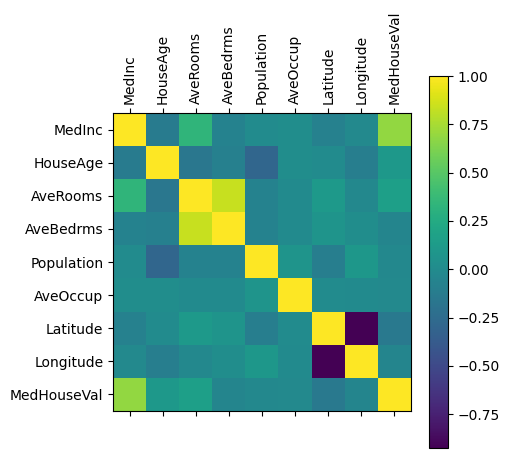

In [56]:
# Visualize the correlation matrix
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

[]

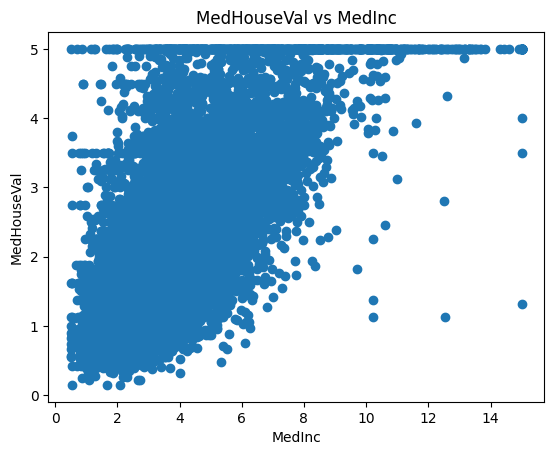

In [57]:
plt.scatter(X_train['MedInc'], y_train)
plt.title("MedHouseVal vs MedInc")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.plot()

In [60]:
#Import Linear Regression class
from sklearn.linear_model import LinearRegression
model = LinearRegression() #Define an object of Linear Regression class

model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the evaluation metrics on train data
print("Evaluation metrics: Train Data")
print("Mean absolute error: ", mae_train)
print("Mean squared error: ", mse_train)
print("R-squared score: ", r2_train)

Evaluation metrics: Train Data
Mean absolute error:  0.5286283596581922
Mean squared error:  0.5179331255246699
R-squared score:  0.6125511913966952


In [63]:
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print the evaluation metrics on train data
print("Evaluation metrics: Test Data")
print("Mean absolute error: ", mae_test)
print("Mean squared error: ", mse_test)
print("R-squared score: ", r2_test)

Evaluation metrics: Test Data
Mean absolute error:  0.5332001304956553
Mean squared error:  0.5558915986952444
R-squared score:  0.5757877060324508


In [64]:
print("Model coefficients: ", model.coef_)
print("Corresponding features: ", df.columns.values)

Model coefficients:  [[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
  -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]]
Corresponding features:  ['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']


# 10. Summary

In this module, we learned

*   To apply a **Linear Regression** model to a dataset
*   To handle **missing values** in the dataset
*   To perform **Exploratory Data Analysis** on the dataset
*   To **train and test** an ML model
